In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from velotest.hypothesis_testing import run_hypothesis_test_on
from velotest.plotting import arrow_plot
import scvelo
import matplotlib.pyplot as plt

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
vkey='velocity', scale=10, self_transitions=True, use_negative_cosines=True
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/li

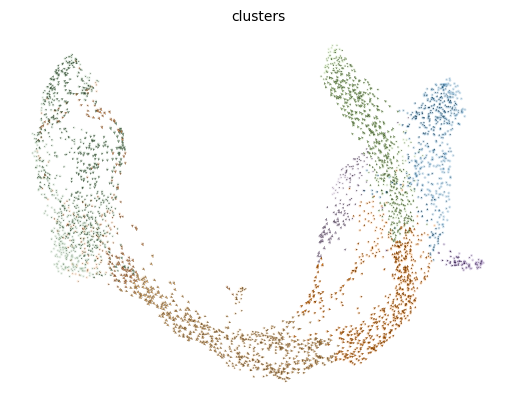

In [3]:
adata = scvelo.datasets.pancreas()
scvelo.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scvelo.pp.moments(adata, n_pcs=30, n_neighbors=30)

# Compute velocity
scvelo.tl.velocity(adata)

# Compute 2D embedding of velocity vectors
scvelo.tl.velocity_graph(adata)
scvelo.pl.velocity_embedding(adata)

/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/li

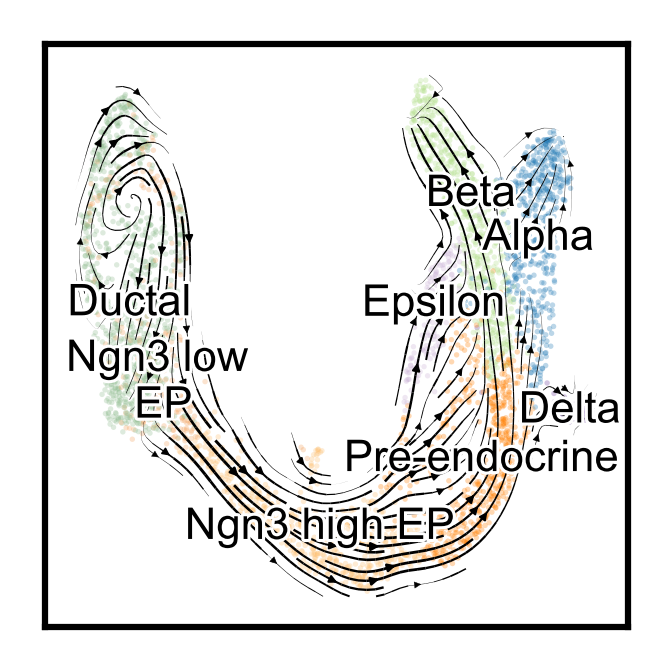

In [4]:
import matplotlib as mpl
mpl.rc_file("../matplotlibrc-embeddings")

cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(dpi=450, constrained_layout=True, figsize=(3.5 * cm, 3.5 * cm))
ax.set(xticks=[], yticks=[], box_aspect=1)

adata_plotting = adata.copy()
cat = adata_plotting.obs['clusters'].cat
adata_plotting.obs['clusters'] = cat.rename_categories({'Ngn3 low EP': '\nNgn3 low\n EP', 'Alpha': '\nAlpha', 'Beta': 'Beta\n'})

scvelo.pl.velocity_embedding_stream(adata_plotting, basis='umap', color='clusters', title='', ax=ax, frameon=True, xlabel='', ylabel='', show=False, 
                                    legend_fontsize=7, fontsize=7, legend_fontweight='normal', figsize=(3.5*cm, 3.5*cm), size=3, linewidth=0.25, arrow_size=0.25, add_margin=.07) #figsize=(3.17*cm, 3.17*cm), dpi=450, 
plt.savefig("fig/03_demo-velocity_embedding_stream.pdf", dpi=450)

In [5]:
# Run test
uncorrected_p_values, h0_rejected, debug_dict = run_hypothesis_test_on(adata, number_neighbors_to_sample_from=300, number_neighborhoods=500, null_distribution="velocities", cosine_empty_neighborhood=None, exclusion_degree=10, correction="bonferroni", restrict_to_velocity_genes=True)

Dropping all the genes which are not velocity genes. 1038 genes left.


100%|██████████| 692/692 [02:13<00:00,  5.19it/s]


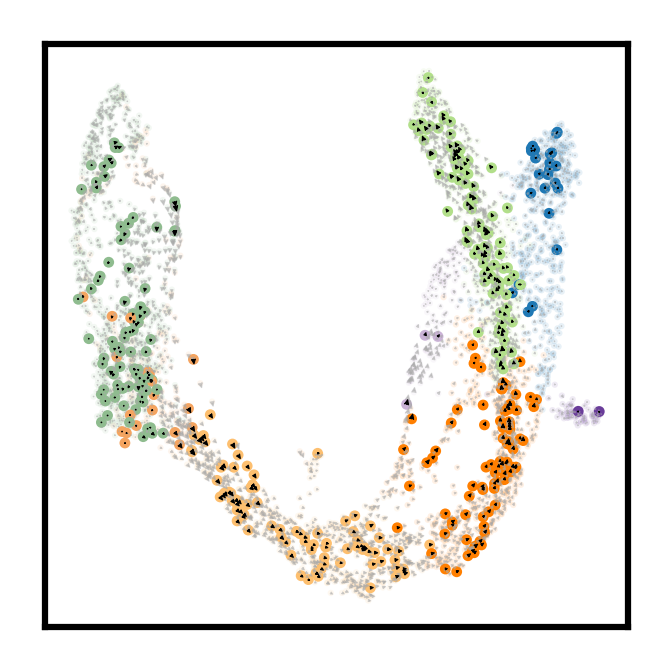

In [6]:
import matplotlib as mpl
mpl.rc_file("../matplotlibrc-embeddings")

cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(dpi=450, constrained_layout=True, figsize=(3.5*cm, 3.5*cm))

adata_plotting = adata.copy()
#cat = adata_plotting.obs['clusters'].cat
#adata_plotting.obs['clusters'] = cat.rename_categories({'Ngn3 low EP': '\nNgn3 low\n EP', 'Alpha': '\nAlpha', 'Beta': 'Beta\n'})

color_dict = dict(zip(adata_plotting.obs["clusters"].cat.categories, adata_plotting.uns["clusters_colors"]))
labels = adata_plotting.obs["clusters"]

arrow_plot(adata_plotting.obsm['X_umap'], adata_plotting.obsm['X_umap']+adata_plotting.obsm['velocity_umap'], uncorrected_p_values, h0_rejected, 
           labels=labels, label_colormap=color_dict, ax=ax, fontsize=7, fontweight='normal', multiplier=0.15, plot_legend=False)
plt.savefig("fig/03_demo-test_results.pdf", transparent=True, dpi=450)

In [7]:
from velotest.plotting import compute_angle_on_gridplot_between
from velotest.plotting import compute_optimal_velocity
import numpy as np

non_empty_neighborhoods_indices = np.where(uncorrected_p_values != 2)[0]
adata_best = adata.copy()
best_velocities = compute_optimal_velocity(debug_dict['Z_velo_position_random'], adata, non_empty_neighborhoods_indices, debug_dict['test_statistic_all'],
                             debug_dict['used_neighborhoods'])
best_velocities_adata = np.zeros((adata.shape[0], 2))
best_velocities_adata[non_empty_neighborhoods_indices] = (best_velocities-adata.obsm['X_umap'][non_empty_neighborhoods_indices])*0.4
adata_best.obsm['velocity_umap'] = best_velocities_adata

angles = compute_angle_on_gridplot_between(adata, adata_best)

In [8]:
from matplotlib import cm
from matplotlib.colors import Normalize
norm = Normalize(vmin=30, vmax=60)
cmap = plt.get_cmap("Greys")
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
colors = sm.to_rgba(angles)

/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/li

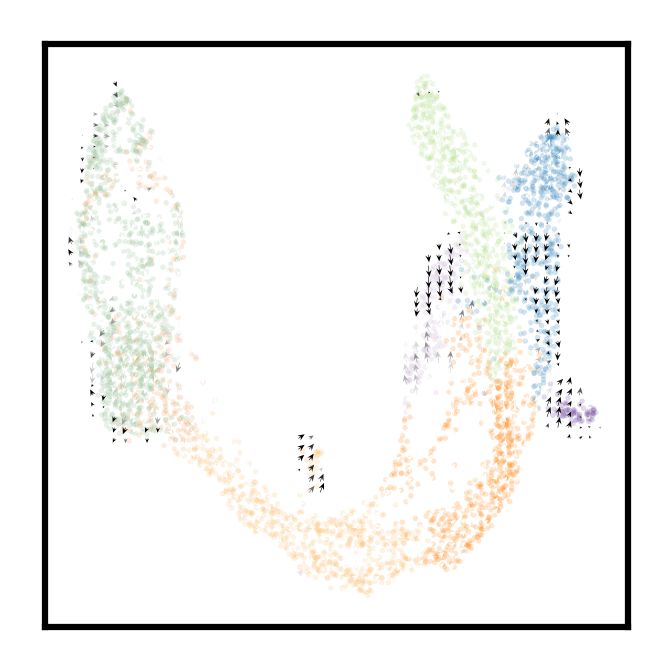

In [9]:
import matplotlib as mpl
mpl.rc_file("../matplotlibrc-embeddings")

cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(dpi=450, constrained_layout=True, figsize=(3.5 * cm, 3.5 * cm))
ax.set(xticks=[], yticks=[], box_aspect=1)

scvelo.pl.velocity_embedding_grid(adata_best, dpi=450, title='', ax=ax, frameon=True, xlabel='', ylabel='', figsize=(3.17*cm, 3.17*cm), fontsize=16, show=False, size=3, linewidth=.25, arrow_size=2, arrow_length=2, arrow_color=colors, edgecolors=None)
plt.savefig("fig/03_demo-optimal_velocity_embedding_grid-fog.pdf", dpi=450, transparent=True)